In [1]:
from util_fdp import run_federated_trajectory


taus = [0.05] * 4 + [0.5]*2 + [0.95]*4
T = 20000
base_seed=2025
E_typ='cons'
E_cons= 2000
gene_process='homo'

true_q, history = run_federated_trajectory(
    dist_type='normal',
    taus=[0.5]*10,
    client_rs=[0.9]*10,
    n_clients=10,
    T=T,
    E_typ=E_typ,
    E_cons=E_cons,
    gene_process=gene_process,
    mode='federated',
    use_true_q_init=False,
    base_seed=42,
    a=0.51, b=100, c=20,
    T_mode='samples')

/root/miniconda3/envs/myconda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-15 17:13:12,053	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-05-15 17:13:13,407	WARNING utils.py:596 -- Detecting docker specified CPUs. In previous versions of Ray, CPU detection in containers was incorrect. Please ensure that Ray has enough CPUs allocated. As a temporary workaround to revert to the prior behavior, set `RAY_USE_MULTIPROCESSING_CPU_COUNT=1` as an env var before starting Ray. Set the env var: `RAY_DISABLE_DOCKER_CPU_WARNING=1` to mute this warning.
2025-05-15 17:13:14,681	INFO worker.py:1852 -- Started a local Ray instance.


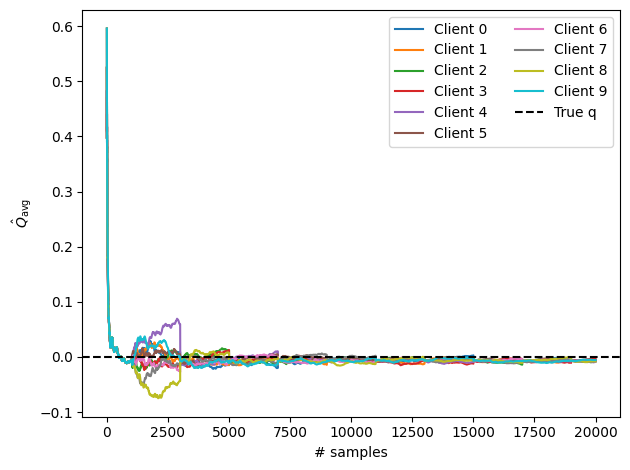

In [2]:
import matplotlib.pyplot as plt
for k, stats in history.items():
    xs = sorted(stats['q_avg'])
    ys = [stats['q_avg'][x] for x in xs]
    plt.plot(xs, ys, label=f'Client {k}')
plt.axhline(true_q, ls='--', color='black', label='True q')
plt.xlabel('# samples'); plt.ylabel(r'$\hat Q_{\mathrm{avg}}$')
plt.legend(ncol=2); plt.tight_layout(); plt.show()